## Classifying the MNIST data

### 1. Importing the packages

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.datasets import fetch_openml

# Libraries related to imputation
from sklearn.impute import SimpleImputer

# Libraries related to outlier detection
from sklearn.neighbors import LocalOutlierFactor

import warnings
import pickle as pk
warnings.filterwarnings('ignore') 
sns.set(rc={'figure.figsize':(11,8)})

pd.options.display.float_format = '{:.2f}'.format

### 2. Importing data from MNIST

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
df = pd.DataFrame(mnist["data"])
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### 3. EDA

#### 3.1 Missing values

In [5]:
missing_values = df.isna().sum()
missing_values[missing_values != 0]

Series([], dtype: int64)

##### There are no missing values in the data

#### 3.2 Visualizing the original data 

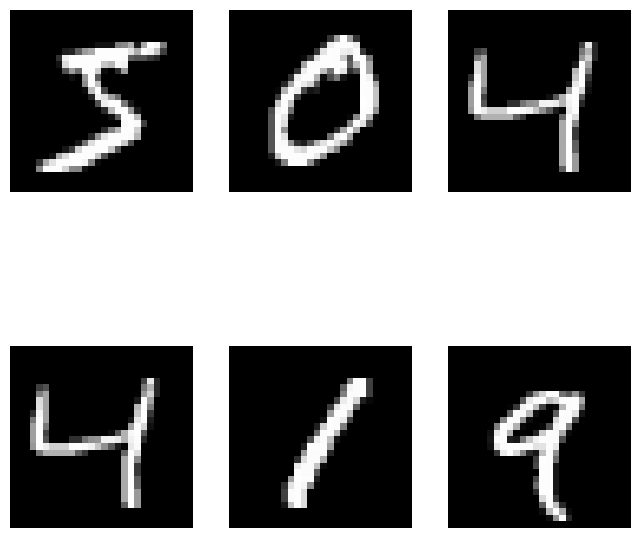

In [6]:
image_original = df.to_numpy().reshape(-1, 28, 28)

# Plotting first 6 images
fig, axs = plt.subplots(2, 3, figsize=(8, 8))
for i in range(2):
    for j in range(3):
        axs[i, j].imshow(image_original[i*2+j], cmap="gray")
        axs[i, j].axis("off")

plt.show()

#### 3.2 Adding noise to the data

In [9]:
# Adding noise to the data using normal distribution
df_noisy = np.clip(df + 10*np.random.normal(scale=0.2, size=df.shape), 0, 1)
df_noisy.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.86,...,0.00,0.18,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
1,1.00,0.00,0.32,1.00,0.00,0.70,0.17,0.00,0.00,0.82,...,1.00,0.00,0.52,1.00,1.00,0.00,1.00,0.00,0.00,1.00
2,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.58,...,0.00,0.00,1.00,0.39,1.00,0.00,1.00,0.00,1.00,0.00
3,0.00,0.97,0.98,0.00,0.00,0.00,1.00,1.00,0.00,0.93,...,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
4,0.00,1.00,1.00,0.00,1.00,0.40,0.95,1.00,1.00,0.00,...,1.00,0.34,0.00,1.00,1.00,0.00,0.00,0.59,0.00,0.41


##### I have chosen to add the noise using normal distribution. By adding noise drawn from a normal distribution, new data points can be created which can be used to determine which classification models perform better on noisy data.

#### 3.3 Visualizing data with added noise

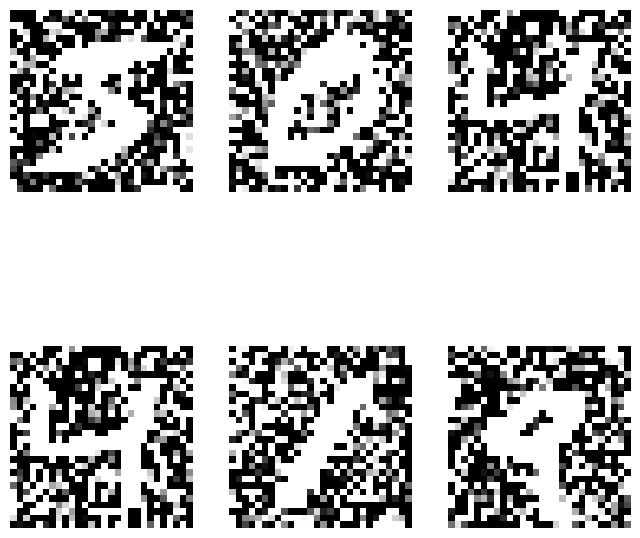

In [10]:
images_noisy = df_noisy.to_numpy().reshape(-1, 28, 28)

# Plotting first 6 noisy images
fig, axs = plt.subplots(2, 3, figsize=(8, 8))
for i in range(0, 2):
    for j in range(0, 3):
        axs[i, j].imshow(images_noisy[i*2+j], cmap="gray")
        axs[i, j].axis("off")

plt.show()

### 4. Data Preprocessing

#### 4.1 Normalize the data

In [12]:
X_org_std = df.to_numpy() / 255.0
X_org_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_noisy_std = df_noisy.to_numpy() / 255.0
X_noisy_std

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.92156863e-03, 0.00000000e+00, 0.00000000e+00],
       [3.92156863e-03, 0.00000000e+00, 1.23705227e-03, ...,
        0.00000000e+00, 0.00000000e+00, 3.92156863e-03],
       [3.92156863e-03, 3.92156863e-03, 3.92156863e-03, ...,
        0.00000000e+00, 3.92156863e-03, 0.00000000e+00],
       ...,
       [3.92156863e-03, 2.02992426e-03, 3.92156863e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.45661752e-03],
       [9.03270953e-06, 2.86076459e-03, 6.00004431e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.92156863e-03],
       [0.00000000e+00, 3.47231996e-03, 0.00000000e+00, ...,
        3.92156863e-03, 0.00000000e+00, 0.00000000e+00]])

##### Since the data points for MNIST data are pixel values in the range from 0 to 255, the data can be normalized by dividing them by 255, which scales them down to the range of [0, 1]

### 5. Feature and Response space

##### Feature space : The X_org_std and X_noisy_std are the feature space

In [14]:
# The 'target' column contains the response 
y = mnist['target']
y[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### 6. Cross-validation set

In [16]:
from sklearn.model_selection import train_test_split


X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org_std, y, test_size=0.2, random_state=42)
X_train_org[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy_std, y, test_size=0.2, random_state=42)
X_train_noisy[:5]

array([[0.        , 0.00332156, 0.        , ..., 0.00344694, 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00028446, 0.00392157, ..., 0.00392157, 0.        ,
        0.        ],
       [0.00192162, 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.00392157],
       [0.0025508 , 0.00269403, 0.00122871, ..., 0.        , 0.0009124 ,
        0.00183042]])